In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plot_creation as plt_data

In [2]:
#Load results
df = pd.read_csv('results.csv')
df.head()

,MODEL,DATA_TYP,MODEL_INDEX,TEST_SPLIT,LAYERS,UNITS,RETURN_SEQUENCE,FORECAST_HORIZON,BATCH_SIZE,EPOCHS,...,OPTIMIZER,LEARNING_RATE,NORMALIZATION,TRAINING_TIME,TEST_TIME,MAE,MSE,RMSE,LOSS,VAL_LOSS
0,rnn,Wind,0,0.3,1,32,True,25,32,5,...,Adam,0.001,minmax,80.613162,1.664035,30.619879,1907.118036,43.670563,0.000154,0.000201
1,rnn,Wind,1,0.3,1,32,False,25,32,5,...,Adam,0.001,minmax,78.559018,1.704293,49.441322,4292.355844,65.516073,0.000158,0.000451
2,rnn,Wind,2,0.3,1,64,True,25,32,5,...,Adam,0.001,minmax,82.091473,1.755648,32.208996,2033.472061,45.094036,0.000165,0.000214
3,rnn,Wind,3,0.3,1,64,False,25,32,5,...,Adam,0.001,minmax,79.242135,1.725193,40.930117,3087.992192,55.569706,0.000163,0.000325
4,rnn,Wind,4,0.3,1,128,True,25,32,5,...,Adam,0.001,minmax,81.392210,1.728616,42.030244,3178.155642,56.375133,0.000164,0.000334


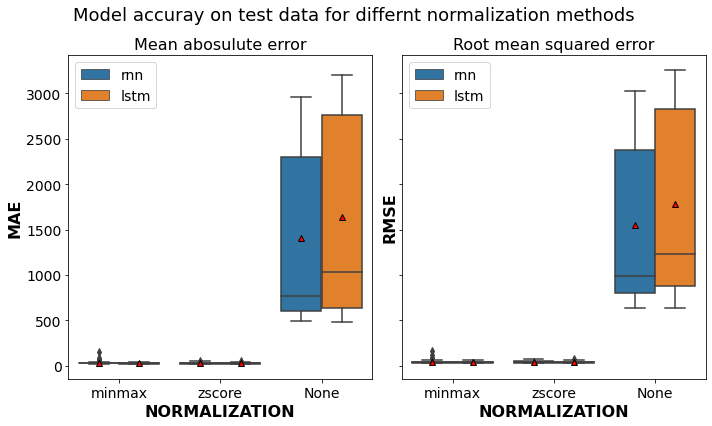

In [8]:
# Cmpare MAE and RMSE based on the normalization
fig, ax = plt.subplots(1, 2, sharey=True, figsize = (10,6))
fig.suptitle('Model accuray on test data for differnt normalization methods ', fontsize=18)

#MAE
sns.boxplot(x="NORMALIZATION", y="MAE", hue = "MODEL", data=df, showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax = ax[0])
plt_data._set_axes( ax = ax[0] , title = 'Mean abosulute error', xlabel="NORMALIZATION", ylabel="MAE" )


#RMSE
sns.boxplot(x="NORMALIZATION", y="RMSE", hue = "MODEL", data=df, showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"},  ax = ax[1])
plt_data._set_axes( ax = ax[1] ,title = 'Root mean squared error', xlabel="NORMALIZATION", ylabel="RMSE")

fig.tight_layout()
plt.show()

In [3]:
wind_df = df[(df['DATA_TYP'] == 'Wind') & (df['NORMALIZATION'] != 'None')]
demand_df = df[(df['DATA_TYP'] == 'Demand') & (df['NORMALIZATION'] != 'None')]

### RNN and LSTM comparision

#### Accuracy

No handles with labels found to put in legend.
No handles with labels found to put in legend.


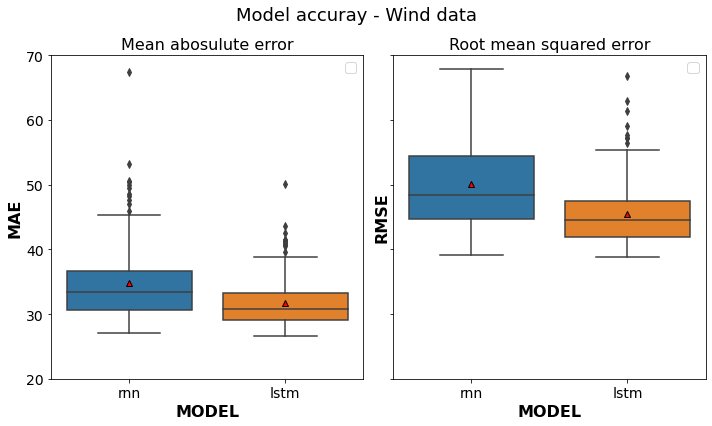

In [9]:
# Cmpare MAE and RMSE wind data
fig, ax = plt.subplots(1, 2, sharey=True, figsize = (10,6))
fig.suptitle('Model accuray - Wind data', fontsize=18)

#MAE
sns.boxplot(x="MODEL", y="MAE", data=wind_df, showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax = ax[0])
plt_data._set_axes( ax = ax[0] , title = 'Mean abosulute error', xlabel="MODEL", ylabel="MAE" )

#RMSE
sns.boxplot(x="MODEL", y="RMSE", data=wind_df, showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax = ax[1])
plt_data._set_axes( ax = ax[1] , title = 'Root mean squared error', xlabel="MODEL", ylabel="RMSE" )

plt.ylim(20,70)
fig.tight_layout()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


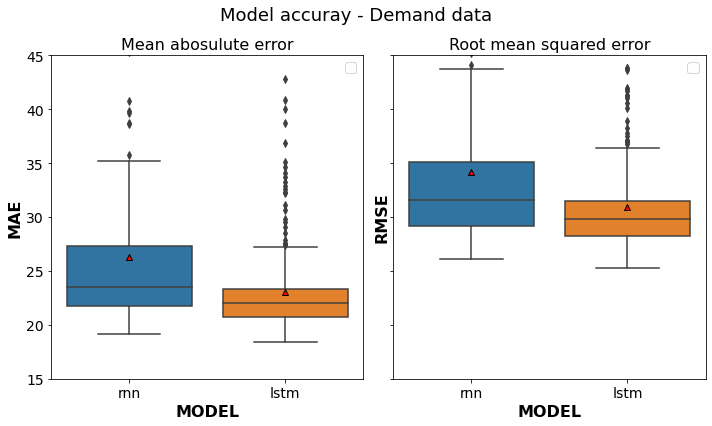

In [10]:
# Cmpare MAE and RMSE deamnd data
fig, ax = plt.subplots(1, 2, sharey=True, figsize = (10,6))
fig.suptitle('Model accuray - Demand data', fontsize=18)

sns.boxplot(x="MODEL", y="MAE", data=demand_df, showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax = ax[0])
plt_data._set_axes( ax = ax[0] , title = 'Mean abosulute error', xlabel="MODEL", ylabel="MAE" )

sns.boxplot(x="MODEL", y="RMSE", data=demand_df, showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax = ax[1])
plt_data._set_axes( ax = ax[1] , title = 'Root mean squared error', xlabel="MODEL", ylabel="RMSE" )

plt.ylim(15,45)
fig.tight_layout()
plt.show()

In [94]:
# statistical analysis
from scipy.stats import wilcoxon

def compare_2_samples(data1, data2, alpha= 0.05):
    # compare samples
    # for non-parameteric  - Wilcoxon signed-rank test
    print("Wilcoxon Signed-Rank Test") 
    stat, p = wilcoxon(data1, data2)
        

    print('Statistics=%.3f, p-value=%s' % (stat, p))

    # interpret
    if p > alpha:
	    print('Same distribution (fail to reject H0)')
    else:
	    print('Different distribution (reject H0)')

In [107]:
# Wind data
# RMSE 
print( 'Wind data- RMSE comparison for RNN & LSTM:----------------- ')
rmse_wind_rnn = wind_df[ (wind_df["MODEL"] == 'rnn')]["RMSE"]
rmse_wind_lstm = wind_df[ (wind_df["MODEL"] == 'lstm')]["RMSE"]

compare_2_samples(rmse_wind_rnn, rmse_wind_lstm, alpha=0.05 )

# MAE
print( '\nWind data- MAE comparison for RNN & LSTM:----------------- ')
mae_wind_rnn = wind_df[ (wind_df["MODEL"] == 'rnn')]["MAE"]
mae_wind_lstm = wind_df[ (wind_df["MODEL"] == 'lstm')]["MAE"]

compare_2_samples(mae_wind_rnn, mae_wind_lstm, alpha=0.05 )

# Demand data
# RMSE 
print( '\nDemand data- RMSE comparison for RNN & LSTM:----------------- ')
rmse_demand_rnn = demand_df[ (demand_df["MODEL"] == 'rnn')]["RMSE"]
rmse_demand_lstm = demand_df[ (demand_df["MODEL"] == 'lstm')]["RMSE"]

compare_2_samples(rmse_demand_rnn, rmse_demand_lstm, alpha=0.05 )

# MAE
print( '\nDemand data- MAE comparison for RNN & LSTM:----------------- ')
mae_demand_rnn = demand_df[ (demand_df["MODEL"] == 'rnn')]["MAE"]
mae_demand_lstm = demand_df[ (demand_df["MODEL"] == 'lstm')]["MAE"]

compare_2_samples(mae_wind_rnn, mae_wind_lstm, alpha=0.05 )


Wind data- RMSE comparison for RNN & LSTM:----------------- 
Wilcoxon Signed-Rank Test
Statistics=5004.000, p-value=2.8549690997766755e-13
Different distribution (reject H0)

Wind data- MAE comparison for RNN & LSTM:----------------- 
Wilcoxon Signed-Rank Test
Statistics=5710.000, p-value=6.432152320297566e-11
Different distribution (reject H0)

Demand data- RMSE comparison for RNN & LSTM:----------------- 
Wilcoxon Signed-Rank Test
Statistics=6721.000, p-value=5.5125285144648326e-08
Different distribution (reject H0)

Demand data- MAE comparison for RNN & LSTM:----------------- 
Wilcoxon Signed-Rank Test
Statistics=5710.000, p-value=6.432152320297566e-11
Different distribution (reject H0)


In [134]:
# Wind data
# RMSE
print( '\nWind data- RMSE mean : ----------------- ')
print( '\nRNN: ')
print( rmse_wind_rnn.describe() )
print( 'LSTM: ')
print( rmse_wind_lstm.describe())


Wind data- RMSE mean : ----------------- 

RNN: 
count    216.000000
mean      50.154420
std        8.987691
min       39.194964
25%       44.652528
50%       48.422353
75%       54.394479
max      115.493959
Name: RMSE, dtype: float64
LSTM: 
count    216.000000
mean      45.532663
std        4.952442
min       38.760609
25%       41.923509
50%       44.509921
75%       47.441180
max       72.254993
Name: RMSE, dtype: float64


In [137]:
#Wind data
# MAE
print( '\nWind data- MAE mean : ----------------- ')
print( '\nRNN: ')
print( mae_wind_rnn.describe() )
print( 'LSTM: ')
print( mae_wind_lstm.describe())


Wind data- MAE mean : ----------------- 

RNN: 
count    216.000000
mean      34.756112
std        6.608263
min       27.132962
25%       30.693068
50%       33.480673
75%       36.622276
max       84.680895
Name: MAE, dtype: float64
LSTM: 
count    216.000000
mean      31.701239
std        3.548351
min       26.628811
25%       29.091250
50%       30.830651
75%       33.236732
max       50.166058
Name: MAE, dtype: float64


In [132]:
# Demand data
# RMSE 
print( '\nDemand data- RMSE: ----------------- ')
print('\nRNN')
print(rmse_demand_rnn.describe())
print('\nLSTM')
print(rmse_demand_lstm.describe())


Demand data- RMSE: ----------------- 

RNN
count    216.000000
mean      34.199961
std       11.735115
min       26.118349
25%       29.148338
50%       31.550449
75%       35.113030
max      167.838807
Name: RMSE, dtype: float64

LSTM
count    216.000000
mean      30.925552
std        4.417186
min       25.239257
25%       28.270177
50%       29.815683
75%       31.523073
max       49.815342
Name: RMSE, dtype: float64


In [133]:
# Demand data
# MAE
print( '\nDemand data- MAE : ----------------- ')
print('\nRNN')
print(mae_demand_rnn.describe())
print('\nLSTM')
print(mae_demand_lstm.describe())


Demand data- MAE : ----------------- 

RNN
count    216.000000
mean      26.312824
std       10.940753
min       19.136369
25%       21.733144
50%       23.515289
75%       27.325900
max      147.698555
Name: MAE, dtype: float64

LSTM
count    216.000000
mean      23.078204
std        4.089200
min       18.431663
25%       20.743023
50%       22.027031
75%       23.360383
max       42.784657
Name: MAE, dtype: float64


#### Train test time

No handles with labels found to put in legend.
No handles with labels found to put in legend.


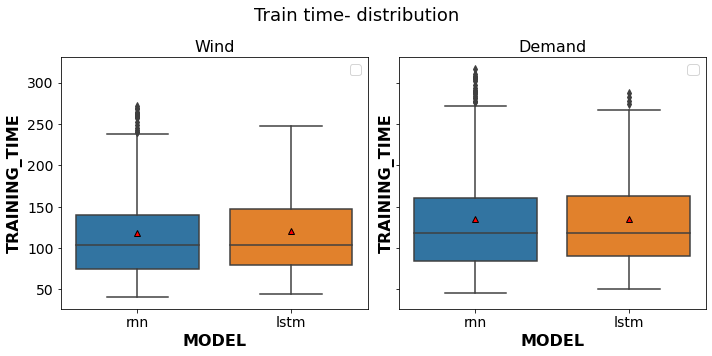

In [4]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize = (10,5))
fig.suptitle('Train time- distribution', fontsize=18)

# wind data
sns.boxplot(x="MODEL", y="TRAINING_TIME", data=wind_df, showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax=ax[0])
plt_data._set_axes( ax = ax[0] , title = 'Wind', xlabel="MODEL", ylabel="TRAINING_TIME" )

# demand data
sns.boxplot(x="MODEL", y="TRAINING_TIME", data=demand_df, showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax=ax[1])
plt_data._set_axes( ax = ax[1] , title = 'Demand', xlabel="MODEL", ylabel="TRAINING_TIME" )


# plt.ylim(10,60)
fig.tight_layout()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


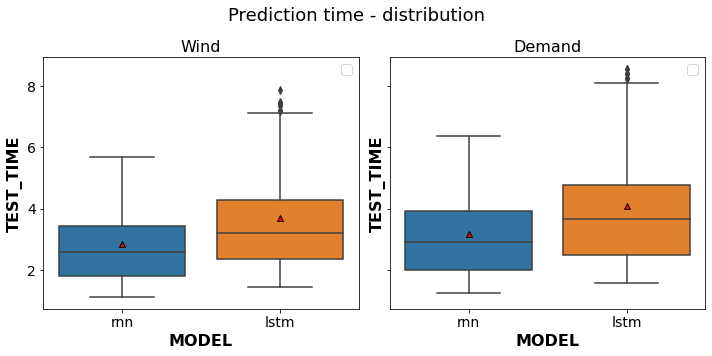

In [5]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize = (10,5))
fig.suptitle('Prediction time - distribution', fontsize=18)

#wind data
sns.boxplot(x="MODEL", y="TEST_TIME", data=wind_df, showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax=ax[0])
plt_data._set_axes( ax = ax[0] , title = 'Wind', xlabel="MODEL", ylabel="TEST_TIME" )

# demand data
sns.boxplot(x="MODEL", y="TEST_TIME", data=demand_df, showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax=ax[1])
plt_data._set_axes( ax = ax[1] , title = 'Demand', xlabel="MODEL", ylabel="TEST_TIME" )

# plt.ylim(10,60)
fig.tight_layout()
plt.show()

In [108]:
# Wind data
# train time
print( 'Wind data- Train time comparison for RNN & LSTM:----------------- ')
train_wind_rnn = wind_df[ (wind_df["MODEL"] == 'rnn')]["TRAINING_TIME"]
train_wind_lstm = wind_df[ (wind_df["MODEL"] == 'lstm')]["TRAINING_TIME"]

compare_2_samples(train_wind_rnn, train_wind_lstm, alpha=0.05 )

# pred time
print( '\nWind data- Prediction time comparison for RNN & LSTM:----------------- ')
pred_wind_rnn = wind_df[ (wind_df["MODEL"] == 'rnn')]["TEST_TIME"]
pred_wind_lstm = wind_df[ (wind_df["MODEL"] == 'lstm')]["TEST_TIME"]

compare_2_samples(pred_wind_rnn, pred_wind_lstm, alpha=0.05 )

# Demand data
# train time
print( '\nDemand data- Train time comparison for RNN & LSTM:----------------- ')
train_demand_rnn = demand_df[ (demand_df["MODEL"] == 'rnn')]["TRAINING_TIME"]
train_demand_lstm = demand_df[ (demand_df["MODEL"] == 'lstm')]["TRAINING_TIME"]

compare_2_samples(train_demand_rnn, train_demand_lstm, alpha=0.05 )

# pred time
print( '\nDemand data- prediction time comparison for RNN & LSTM:----------------- ')
pred_demand_rnn = demand_df[ (demand_df["MODEL"] == 'rnn')]["TEST_TIME"]
pred_demand_lstm = demand_df[ (demand_df["MODEL"] == 'lstm')]["TEST_TIME"]

compare_2_samples(pred_wind_rnn, pred_wind_lstm, alpha=0.05 )

Wind data- Train time comparison for RNN & LSTM:----------------- 
Wilcoxon Signed-Rank Test
Statistics=8660.000, p-value=0.000882953581617356
Different distribution (reject H0)

Wind data- Prediction time comparison for RNN & LSTM:----------------- 
Wilcoxon Signed-Rank Test
Statistics=0.000, p-value=3.427297285516997e-37
Different distribution (reject H0)

Demand data- Train time comparison for RNN & LSTM:----------------- 
Wilcoxon Signed-Rank Test
Statistics=10243.000, p-value=0.10872008801056837
Same distribution (fail to reject H0)

Demand data- prediction time comparison for RNN & LSTM:----------------- 
Wilcoxon Signed-Rank Test
Statistics=0.000, p-value=3.427297285516997e-37
Different distribution (reject H0)


In [139]:
# Wind data
# Train time 
print( '\nWind data- Train time : ----------------- ')
print( 'RNN: ')
print(train_wind_rnn.describe())
print( 'LSTM: ')
print( train_wind_lstm.describe())


Wind data- Train time : ----------------- 
RNN: 
count    216.000000
mean     117.866919
std       63.762440
min       40.343674
25%       74.356092
50%      103.037562
75%      140.393482
max      271.211015
Name: TRAINING_TIME, dtype: float64
LSTM: 
count    216.000000
mean     120.028320
std       56.447102
min       44.123729
25%       79.606823
50%      103.868959
75%      147.546002
max      247.436378
Name: TRAINING_TIME, dtype: float64


In [140]:
# Wind data
# Pred time
print( '\nWind data- Prediction time : ----------------- ')
print( 'RNN: ')
print( pred_wind_rnn.describe())
print( 'LSTM: ')
print( pred_wind_lstm.describe())


Wind data- Prediction time : ----------------- 
RNN: 
count    216.000000
mean       2.846494
std        1.245568
min        1.094348
25%        1.793460
50%        2.582367
75%        3.439117
max        5.693664
Name: TEST_TIME, dtype: float64
LSTM: 
count    216.000000
mean       3.676378
std        1.705248
min        1.439742
25%        2.345777
50%        3.201388
75%        4.278478
max        7.890256
Name: TEST_TIME, dtype: float64


In [141]:
# Demand data
# Train time 
print( '\nDemand data- Train time : ----------------- ')
print( 'RNN: ' )
print( train_demand_rnn.describe() )
print( 'LSTM: ')
print( train_demand_lstm.describe())


Demand data- Train time : ----------------- 
RNN: 
count    216.000000
mean     135.247512
std       74.537596
min       45.826083
25%       83.707336
50%      117.663851
75%      160.372077
max      316.820824
Name: TRAINING_TIME, dtype: float64
LSTM: 
count    216.000000
mean     134.855591
std       63.338116
min       50.081527
25%       90.744822
50%      117.936281
75%      162.607215
max      287.343289
Name: TRAINING_TIME, dtype: float64


In [142]:
# Pred time
print( '\nDemand data- Prediction time : ----------------- ')
print( 'RNN: ')
print( pred_demand_rnn.describe() )
print( 'LSTM: ' )
print( pred_demand_lstm.describe())


Demand data- Prediction time : ----------------- 
RNN: 
count    216.000000
mean       3.182378
std        1.435525
min        1.249246
25%        2.005336
50%        2.908537
75%        3.911353
max        6.384018
Name: TEST_TIME, dtype: float64
LSTM: 
count    216.000000
mean       4.093744
std        1.958261
min        1.549446
25%        2.495130
50%        3.656597
75%        4.782888
max        8.577075
Name: TEST_TIME, dtype: float64


### Model parameters

#### plots

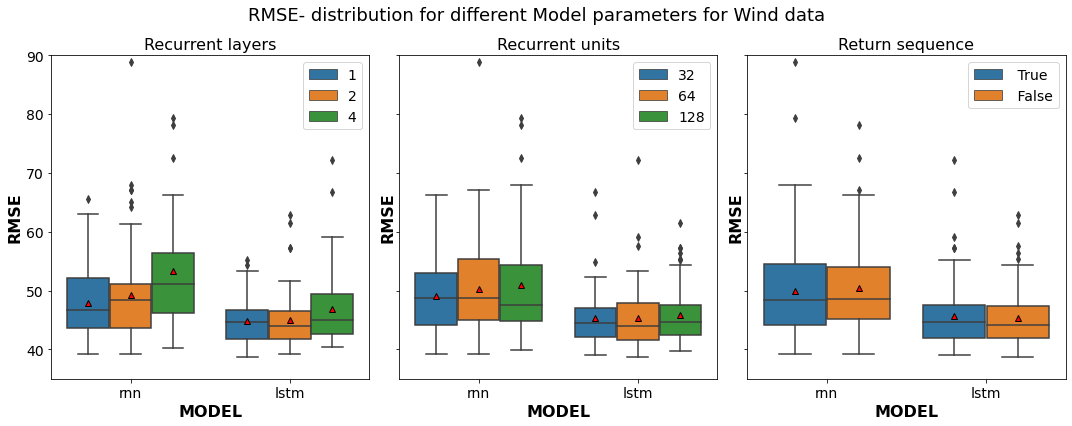

In [28]:
# ~ Wind data
fig, ax = plt.subplots(1, 3, sharey=True, figsize = (15,6))
fig.suptitle('RMSE- distribution for different Model parameters for Wind data', fontsize=18)

# layers
sns.boxplot(x="MODEL", y="RMSE", hue="LAYERS", data=wind_df, order=['rnn','lstm'], 
            showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax = ax[0])
plt_data._set_axes( ax = ax[0] , title = 'Recurrent layers', xlabel="MODEL", ylabel="RMSE", legend_loc= 'upper right')


#units
sns.boxplot(x="MODEL", y="RMSE", hue="UNITS", data=wind_df,order=['rnn','lstm'],
            showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax = ax[1])
plt_data._set_axes( ax = ax[1] , title = 'Recurrent units', xlabel="MODEL", ylabel="RMSE", legend_loc= 'upper right')


#return_seq
sns.boxplot(x="MODEL", y="RMSE", hue="RETURN_SEQUENCE", data=wind_df, order=['rnn','lstm'],
            showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax = ax[2])
plt_data._set_axes( ax = ax[2] , title = 'Return sequence', xlabel="MODEL", ylabel="RMSE", legend_loc= 'upper right')


plt.ylim(35,90)
fig.tight_layout()
plt.show()

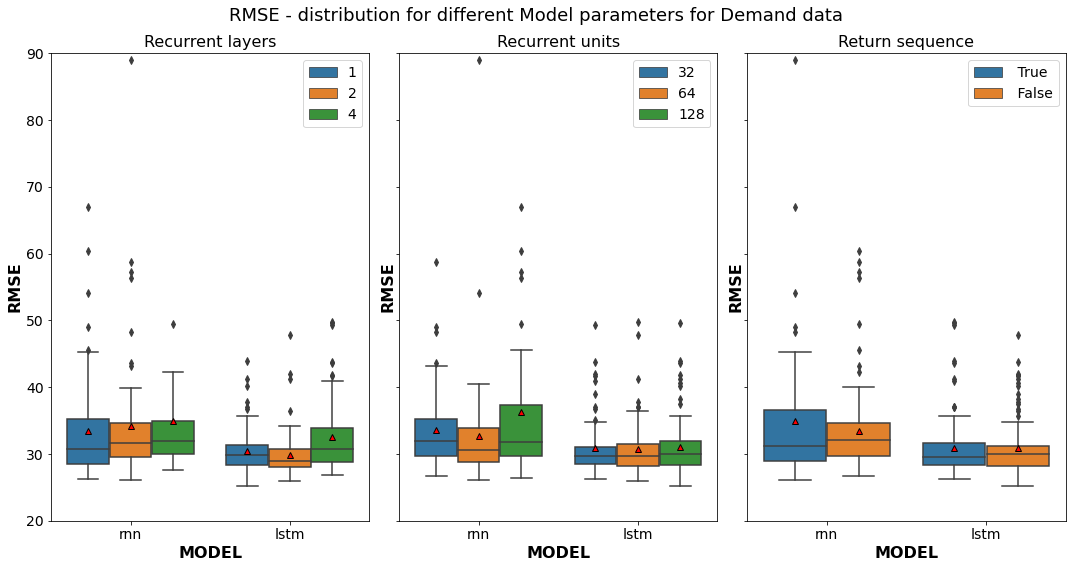

In [27]:
# ~ Demand data
fig, ax = plt.subplots(1,3, sharey=True, figsize = (15,8))
fig.suptitle('RMSE - distribution for different Model parameters for Demand data', fontsize=18)

#layers
sns.boxplot(x="MODEL", y="RMSE", hue="LAYERS", data=demand_df,showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax = ax[0])
plt_data._set_axes( ax = ax[0] , title = 'Recurrent layers', xlabel="MODEL", ylabel="RMSE", legend_loc= 'upper right')

#units
sns.boxplot(x="MODEL", y="RMSE", hue="UNITS", data=demand_df,showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax = ax[1])
plt_data._set_axes( ax = ax[1] , title = 'Recurrent units', xlabel="MODEL", ylabel="RMSE", legend_loc= 'upper right')

#return_seq
sns.boxplot(x="MODEL", y="RMSE", hue="RETURN_SEQUENCE", data=demand_df,showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax = ax[2])
plt_data._set_axes( ax = ax[2] , title = 'Return sequence', xlabel="MODEL", ylabel="RMSE", legend_loc= 'upper right')


plt.ylim(20,90)
fig.tight_layout()
plt.show()

#### Layers

In [256]:
rmse_wind_rnn_1 = wind_df[(wind_df['LAYERS'] == 1) & (wind_df['MODEL'] == 'rnn') ]['RMSE']
rmse_wind_rnn_2 = wind_df[(wind_df['LAYERS'] == 2) & (wind_df['MODEL'] == 'rnn')]['RMSE']
rmse_wind_rnn_4 = wind_df[(wind_df['LAYERS'] == 4) & (wind_df['MODEL'] == 'rnn')]['RMSE']

rmse_wind_lstm_1 = wind_df[(wind_df['LAYERS'] == 1) & (wind_df['MODEL'] == 'lstm') ]['RMSE']
rmse_wind_lstm_2 = wind_df[(wind_df['LAYERS'] == 2) & (wind_df['MODEL'] == 'lstm')]['RMSE']
rmse_wind_lstm_4 = wind_df[(wind_df['LAYERS'] == 4) & (wind_df['MODEL'] == 'lstm')]['RMSE']

rmse_demand_rnn_1 = demand_df[(demand_df['LAYERS'] == 1) & (demand_df['MODEL'] == 'rnn') ]['RMSE']
rmse_demand_rnn_2 = demand_df[(demand_df['LAYERS'] == 2) & (demand_df['MODEL'] == 'rnn')]['RMSE']
rmse_demand_rnn_4 = demand_df[(demand_df['LAYERS'] == 4) & (demand_df['MODEL'] == 'rnn')]['RMSE']

rmse_demand_lstm_1 = demand_df[(demand_df['LAYERS'] == 1) & (demand_df['MODEL'] == 'lstm') ]['RMSE']
rmse_demand_lstm_2 = demand_df[(demand_df['LAYERS'] == 2) & (demand_df['MODEL'] == 'lstm')]['RMSE']
rmse_demand_lstm_4 = demand_df[(demand_df['LAYERS'] == 4) & (demand_df['MODEL'] == 'lstm')]['RMSE']

#### statistical analysis

##### Wind data

In [252]:
# Wind data
# layers
print( '\nWind data - RNN -  layers comparison:----------------- ')
print("----Layers 1~2----")
compare_2_samples(rmse_wind_rnn_1, rmse_wind_rnn_2, alpha=0.05 )

print("----Layers 2~4----")
compare_2_samples(rmse_wind_rnn_2, rmse_wind_rnn_4, alpha=0.05 )

print("----Layers 1~4----")
compare_2_samples(rmse_wind_rnn_1, rmse_wind_rnn_4, alpha=0.05 )


Wind data - RNN -  layers comparison:----------------- 
----Layers 1~2----
Wilcoxon Signed-Rank Test
Statistics=564.000, p-value=2.5676445621603887e-05
Different distribution (reject H0)
----Layers 2~4----
Wilcoxon Signed-Rank Test
Statistics=0.000, p-value=1.6587518023763977e-13
Different distribution (reject H0)
----Layers 1~4----
Wilcoxon Signed-Rank Test
Statistics=0.000, p-value=1.6587518023763977e-13
Different distribution (reject H0)


In [254]:
#  Wind data
# layers
print( '\nWind data - LSTM -  layers comparison:----------------- ')
print("----Layers 1~2----")
compare_2_samples(rmse_wind_lstm_1, rmse_wind_lstm_2, alpha=0.05 )

print("----Layers 2~4----")
compare_2_samples(rmse_wind_lstm_2, rmse_wind_lstm_4, alpha=0.05 )

print("----Layers 1~4----")
compare_2_samples(rmse_wind_lstm_1, rmse_wind_lstm_4, alpha=0.05 )


Wind data - LSTM -  layers comparison:----------------- 
----Layers 1~2----
Wilcoxon Signed-Rank Test
Statistics=808.000, p-value=0.004518190129136958
Different distribution (reject H0)
----Layers 2~4----
Wilcoxon Signed-Rank Test
Statistics=0.000, p-value=1.6587518023763977e-13
Different distribution (reject H0)
----Layers 1~4----
Wilcoxon Signed-Rank Test
Statistics=0.000, p-value=1.6587518023763977e-13
Different distribution (reject H0)


In [206]:
# Layers
print('\nWind data --- model layers :-------------------------')
print('RNN:   layers -- 1')
print(rmse_wind_rnn_1.describe())
print( 'Standard error :', np.std(rmse_wind_rnn_1) / np.sqrt(len(rmse_wind_rnn_1)))


Wind data --- model layers :-------------------------
RNN:   layers -- 1
count    72.000000
mean     47.942701
std       6.124359
min      39.231962
25%      43.614634
50%      46.626804
75%      52.047422
max      65.516073
Name: RMSE, dtype: float64
Standard error : 0.7167328499413981


In [207]:
print('RNN:   layers -- 2')
print(rmse_wind_rnn_2.describe())
print( 'Standard error :', np.std(rmse_wind_rnn_2) / np.sqrt(len(rmse_wind_rnn_2)))

RNN:   layers -- 2
count    72.000000
mean     49.175706
std       8.410599
min      39.194964
25%      43.704907
50%      48.341554
75%      51.041721
max      88.840138
Name: RMSE, dtype: float64
Standard error : 0.9842911514567172


In [208]:
print('RNN:   layers -- 4')
print(rmse_wind_rnn_4.describe())
print( 'Standard error :', np.std(rmse_wind_rnn_4) / np.sqrt(len(rmse_wind_rnn_4)))

RNN:   layers -- 4
count     72.000000
mean      53.344853
std       10.959521
min       40.284556
25%       46.254013
50%       51.195641
75%       56.417059
max      115.493959
Name: RMSE, dtype: float64
Standard error : 1.2825912111127356


In [209]:
# Layers
print('\nWind data --- model layers :-------------------------')
print('LSTM:   layers -- 1')
print(rmse_wind_lstm_1.describe())
print( 'Standard error :', np.std(rmse_wind_lstm_1) / np.sqrt(len(rmse_wind_lstm_1)))


Wind data --- model layers :-------------------------
LSTM:   layers -- 1
count    72.000000
mean     44.832637
std       3.723991
min      38.760609
25%      41.819189
50%      44.622501
75%      46.643114
max      55.134636
Name: RMSE, dtype: float64
Standard error : 0.435818145974735


In [210]:
print('LSTM:   layers -- 2')
print(rmse_wind_lstm_2.describe())
print( 'Standard error :', np.std(rmse_wind_lstm_2) / np.sqrt(len(rmse_wind_lstm_2)))

LSTM:   layers -- 2
count    72.000000
mean     44.967916
std       4.728140
min      39.189972
25%      41.703643
50%      43.939575
75%      46.526414
max      62.871563
Name: RMSE, dtype: float64
Standard error : 0.5533334968289101


In [211]:
print('LSTM:   layers -- 4')
print(rmse_wind_lstm_4.describe())
print( 'Standard error :', np.std(rmse_wind_lstm_4) / np.sqrt(len(rmse_wind_lstm_4)))

LSTM:   layers -- 4
count    72.000000
mean     46.797437
std       5.966990
min      40.364748
25%      42.692620
50%      45.059118
75%      49.341590
max      72.254993
Name: RMSE, dtype: float64
Standard error : 0.6983159763551394


##### Demand data

In [257]:
# Wind data
# layers
print( '\nDemand data - RNN -  layers comparison:----------------- ')
print("----Layers 1~2----")
compare_2_samples(rmse_demand_rnn_1, rmse_demand_rnn_2, alpha=0.05 )

print("----Layers 2~4----")
compare_2_samples(rmse_demand_rnn_2, rmse_demand_rnn_4, alpha=0.05 )

print("----Layers 1~4----")
compare_2_samples(rmse_demand_rnn_1, rmse_demand_rnn_4, alpha=0.05 )


Demand data - RNN -  layers comparison:----------------- 
----Layers 1~2----
Wilcoxon Signed-Rank Test
Statistics=1213.000, p-value=0.5708629523576603
Same distribution (fail to reject H0)
----Layers 2~4----
Wilcoxon Signed-Rank Test
Statistics=1197.000, p-value=0.5114586418540169
Same distribution (fail to reject H0)
----Layers 1~4----
Wilcoxon Signed-Rank Test
Statistics=1196.000, p-value=0.5078559783904282
Same distribution (fail to reject H0)


In [258]:
print( '\nDemand data - LSTM -  layers comparison:----------------- ')
print("----Layers 1~2----")
compare_2_samples(rmse_demand_lstm_1, rmse_demand_lstm_2, alpha=0.05 )

print("----Layers 2~4----")
compare_2_samples(rmse_demand_lstm_2, rmse_demand_lstm_4, alpha=0.05 )

print("----Layers 1~4----")
compare_2_samples(rmse_demand_lstm_1, rmse_demand_lstm_4, alpha=0.05 )


Demand data - LSTM -  layers comparison:----------------- 
----Layers 1~2----
Wilcoxon Signed-Rank Test
Statistics=1009.000, p-value=0.08697658398126569
Same distribution (fail to reject H0)
----Layers 2~4----
Wilcoxon Signed-Rank Test
Statistics=665.000, p-value=0.00027053956096875174
Different distribution (reject H0)
----Layers 1~4----
Wilcoxon Signed-Rank Test
Statistics=825.000, p-value=0.006067370294489699
Different distribution (reject H0)


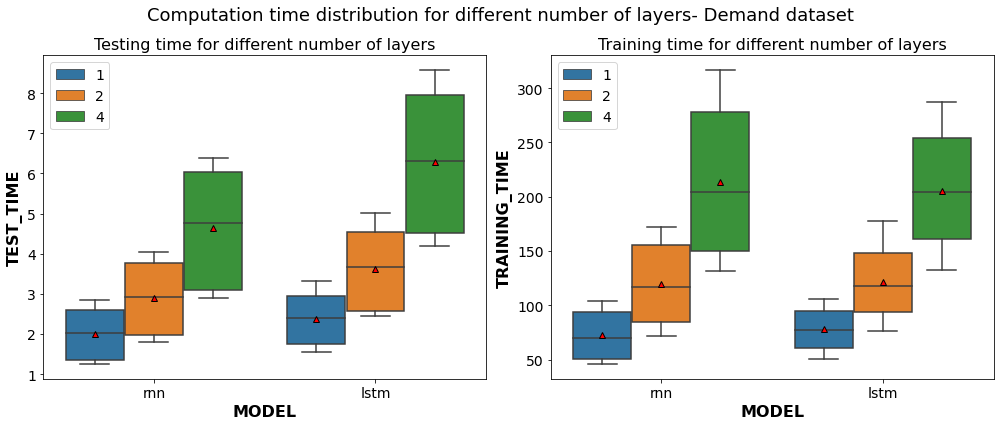

In [26]:
# demand data
fig, ax = plt.subplots(1, 2, figsize = (14,6))
fig.suptitle('Computation time distribution for different number of layers- Demand dataset', fontsize=18)

# testing time
sns.boxplot(x="MODEL", y="TEST_TIME", data=demand_df, hue="LAYERS", showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax=ax[0])
plt_data._set_axes( ax = ax[0] , title = 'Testing time for different number of layers', xlabel="MODEL", ylabel="TEST_TIME", legend_loc= 'upper left')

# training time
sns.boxplot(x="MODEL", y="TRAINING_TIME", data=demand_df, hue="LAYERS", showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax=ax[1])
plt_data._set_axes( ax = ax[1] , title = 'Training time for different number of layers', xlabel="MODEL", ylabel="TRAINING_TIME", legend_loc= 'upper left')


# plt.ylim(10,60)
fig.tight_layout()
plt.show()

In [222]:
print('\nDemand data --- model layers :-------------------------')
print('RNN:   layers -- 1')
print(rmse_demand_rnn_1.describe())
print( 'Standard error :', np.std(rmse_demand_rnn_1) / np.sqrt(len(rmse_demand_rnn_1)))


Demand data --- model layers :-------------------------
RNN:   layers -- 1
count    72.000000
mean     33.475765
std       7.708852
min      26.223363
25%      28.570522
50%      30.704244
75%      35.269992
max      66.962687
Name: RMSE, dtype: float64
Standard error : 0.9021658665342186


In [213]:
print('\nDemand data --- model layers :-------------------------')
print('RNN:   layers -- 2')
print(rmse_demand_rnn_2.describe())
print( 'Standard error :', np.std(rmse_demand_rnn_2) / np.sqrt(len(rmse_demand_rnn_2)))


Demand data --- model layers :-------------------------
RNN:   layers -- 2
count    72.000000
mean     34.180913
std       9.267678
min      26.118349
25%      29.556386
50%      31.670090
75%      34.608499
max      88.952046
Name: RMSE, dtype: float64
Standard error : 1.0845950195372467


In [214]:
print('\nDemand data --- model layers :-------------------------')
print('RNN:   layers -- 4')
print(rmse_demand_rnn_4.describe())
print( 'Standard error :', np.std(rmse_demand_rnn_4) / np.sqrt(len(rmse_demand_rnn_4)))


Demand data --- model layers :-------------------------
RNN:   layers -- 4
count     72.000000
mean      34.943204
std       16.450207
min       27.572634
25%       29.957220
50%       31.899791
75%       34.968840
max      167.838807
Name: RMSE, dtype: float64
Standard error : 1.9251654429584013


In [215]:
print('\nDemand data --- model layers :-------------------------')
print('LSTM:   layers -- 1')
print(rmse_demand_lstm_1.describe())
print( 'Standard error :', np.std(rmse_demand_lstm_1) / np.sqrt(len(rmse_demand_lstm_1)))


Demand data --- model layers :-------------------------
LSTM:   layers -- 1
count    72.000000
mean     30.403283
std       3.514498
min      25.239257
25%      28.283483
50%      29.784711
75%      31.297467
max      43.853236
Name: RMSE, dtype: float64
Standard error : 0.4113011604845983


In [216]:
print('\nDemand data --- model layers :-------------------------')
print('LSTM:   layers -- 2')
print(rmse_demand_lstm_2.describe())
print( 'Standard error :', np.std(rmse_demand_lstm_2) / np.sqrt(len(rmse_demand_lstm_2)))


Demand data --- model layers :-------------------------
LSTM:   layers -- 2
count    72.000000
mean     29.838546
std       3.544504
min      25.935952
25%      28.071198
50%      28.990511
75%      30.691166
max      47.786035
Name: RMSE, dtype: float64
Standard error : 0.4148127908696797


In [217]:
print('\nDemand data --- model layers :-------------------------')
print('LSTM:   layers -- 4')
print(rmse_demand_lstm_4.describe())
print( 'Standard error :', np.std(rmse_demand_lstm_4) / np.sqrt(len(rmse_demand_lstm_4)))


Demand data --- model layers :-------------------------
LSTM:   layers -- 4
count    72.000000
mean     32.534826
std       5.483424
min      26.820914
25%      28.847648
50%      30.692792
75%      33.848994
max      49.815342
Name: RMSE, dtype: float64
Standard error : 0.6417243441414404


#### Units

In [272]:
rmse_wind_rnn_32 = wind_df[(wind_df['UNITS'] == 32) & (wind_df['MODEL'] == 'rnn') ]['RMSE']
rmse_wind_rnn_64 = wind_df[(wind_df['UNITS'] == 64) & (wind_df['MODEL'] == 'rnn')]['RMSE']
rmse_wind_rnn_128 = wind_df[(wind_df['UNITS'] == 128) & (wind_df['MODEL'] == 'rnn')]['RMSE']

rmse_wind_lstm_32 = wind_df[(wind_df['UNITS'] == 32) & (wind_df['MODEL'] == 'lstm') ]['RMSE']
rmse_wind_lstm_64 = wind_df[(wind_df['UNITS'] == 64) & (wind_df['MODEL'] == 'lstm')]['RMSE']
rmse_wind_lstm_128 = wind_df[(wind_df['UNITS'] == 128) & (wind_df['MODEL'] == 'lstm')]['RMSE']

rmse_demand_rnn_32 = demand_df[(demand_df['UNITS'] == 32) & (demand_df['MODEL'] == 'rnn') ]['RMSE']
rmse_demand_rnn_64 = demand_df[(demand_df['UNITS'] == 64) & (demand_df['MODEL'] == 'rnn')]['RMSE']
rmse_demand_rnn_128 = demand_df[(demand_df['UNITS'] == 128) & (demand_df['MODEL'] == 'rnn')]['RMSE']

rmse_demand_lstm_32 = demand_df[(demand_df['UNITS'] == 32) & (demand_df['MODEL'] == 'lstm') ]['RMSE']
rmse_demand_lstm_64 = demand_df[(demand_df['UNITS'] == 64) & (demand_df['MODEL'] == 'lstm')]['RMSE']
rmse_demand_lstm_128 = demand_df[(demand_df['UNITS'] == 128) & (demand_df['MODEL'] == 'lstm')]['RMSE']

#### statistical analysis

##### Wind data

In [327]:
# Wind data
# Units
print( '\nWind data - RNN -  Units comparison:----------------- ')
print("----Units 32~64----")
compare_2_samples(rmse_wind_rnn_32, rmse_wind_rnn_64, alpha=0.05 )

print("----Units 64~128----")
compare_2_samples(rmse_wind_rnn_64, rmse_wind_rnn_128, alpha=0.05 )

print("----Units 32~128----")
compare_2_samples(rmse_wind_rnn_32, rmse_wind_rnn_128, alpha=0.05 )


Wind data - RNN -  Units comparison:----------------- 
----Units 32~64----
Wilcoxon Signed-Rank Test
Statistics=1259.000, p-value=0.757592999689803
Same distribution (fail to reject H0)
----Units 64~128----
Wilcoxon Signed-Rank Test
Statistics=1269.000, p-value=0.8006343602317088
Same distribution (fail to reject H0)
----Units 32~128----
Wilcoxon Signed-Rank Test
Statistics=1197.000, p-value=0.5114586418540169
Same distribution (fail to reject H0)


In [323]:
print( '\nWind data - LSTM -  Units comparison:----------------- ')
print("----Units 32~64----")
compare_2_samples(rmse_wind_lstm_32, rmse_wind_lstm_64, alpha=0.05 )

print("----Units 64~128----")
compare_2_samples(rmse_wind_lstm_64, rmse_wind_lstm_128, alpha=0.05 )

print("----Units 32~128----")
compare_2_samples(rmse_wind_lstm_32, rmse_wind_lstm_128, alpha=0.05 )


Wind data - LSTM -  Units comparison:----------------- 
----Units 32~64----
Wilcoxon Signed-Rank Test
Statistics=1237.000, p-value=0.6656684452210636
Same distribution (fail to reject H0)
----Units 64~128----
Wilcoxon Signed-Rank Test
Statistics=1141.000, p-value=0.3316364407026666
Same distribution (fail to reject H0)
----Units 32~128----
Wilcoxon Signed-Rank Test
Statistics=1279.000, p-value=0.8442898396297687
Same distribution (fail to reject H0)


In [277]:
# Units
print('\nWind data --- model Units :-------------------------')
print('RNN:   Units  -- 32')
print(rmse_wind_rnn_32.describe())
print( 'Standard error :', np.std(rmse_wind_rnn_32) / np.sqrt(len(rmse_wind_rnn_32)))


Wind data --- model Units :-------------------------
RNN:   Units  -- 32
count    72.000000
mean     49.144750
std       6.278242
min      39.231962
25%      44.142118
50%      48.813523
75%      53.030167
max      66.318471
Name: RMSE, dtype: float64
Standard error : 0.7347418241303981


In [278]:
print('\nWind data --- model Units :-------------------------')
print('RNN:   Units  -- 64')
print(rmse_wind_rnn_64.describe())
print( 'Standard error :', np.std(rmse_wind_rnn_64) / np.sqrt(len(rmse_wind_rnn_64)))


Wind data --- model Units :-------------------------
RNN:   Units  -- 64
count    72.000000
mean     50.302559
std       8.312835
min      39.194964
25%      44.972190
50%      48.648932
75%      55.294671
max      88.840138
Name: RMSE, dtype: float64
Standard error : 0.9728498943689231


In [279]:
print('\nWind data --- model Units :-------------------------')
print('RNN:   Units  -- 128')
print(rmse_wind_rnn_128.describe())
print( 'Standard error :', np.std(rmse_wind_rnn_128) / np.sqrt(len(rmse_wind_rnn_128)))


Wind data --- model Units :-------------------------
RNN:   Units  -- 128
count     72.000000
mean      51.015952
std       11.588052
min       39.926343
25%       44.852676
50%       47.484326
75%       54.300020
max      115.493959
Name: RMSE, dtype: float64
Standard error : 1.3561480858284765


In [280]:
# Units
print('\nWind data --- model Units :-------------------------')
print('LSTM:   Units  -- 32')
print(rmse_wind_lstm_32.describe())
print( 'Standard error :', np.std(rmse_wind_lstm_32) / np.sqrt(len(rmse_wind_lstm_32)))


Wind data --- model Units :-------------------------
LSTM:   Units  -- 32
count    72.000000
mean     45.401129
std       4.717863
min      38.989107
25%      42.067572
50%      44.517050
75%      47.054807
max      66.816018
Name: RMSE, dtype: float64
Standard error : 0.5521308492477034


In [281]:
# Units
print('\nWind data --- model Units :-------------------------')
print('LSTM:   Units  -- 64')
print(rmse_wind_lstm_64.describe())
print( 'Standard error :', np.std(rmse_wind_lstm_64) / np.sqrt(len(rmse_wind_lstm_64)))


Wind data --- model Units :-------------------------
LSTM:   Units  -- 64
count    72.000000
mean     45.295660
std       5.308273
min      38.760609
25%      41.665513
50%      43.937425
75%      47.818085
max      72.254993
Name: RMSE, dtype: float64
Standard error : 0.6212264291065671


In [283]:
#  Units
print('\nWind data --- model Units :-------------------------')
print('LSTM:   Units  -- 128')
print(rmse_wind_lstm_128.describe())
print( 'Standard error :', np.std(rmse_wind_lstm_128) / np.sqrt(len(rmse_wind_lstm_128)))


Wind data --- model Units :-------------------------
LSTM:   Units  -- 128
count    72.000000
mean     45.901201
std       4.860319
min      39.658571
25%      42.462137
50%      44.678853
75%      47.497985
max      61.403048
Name: RMSE, dtype: float64
Standard error : 0.568802443756906


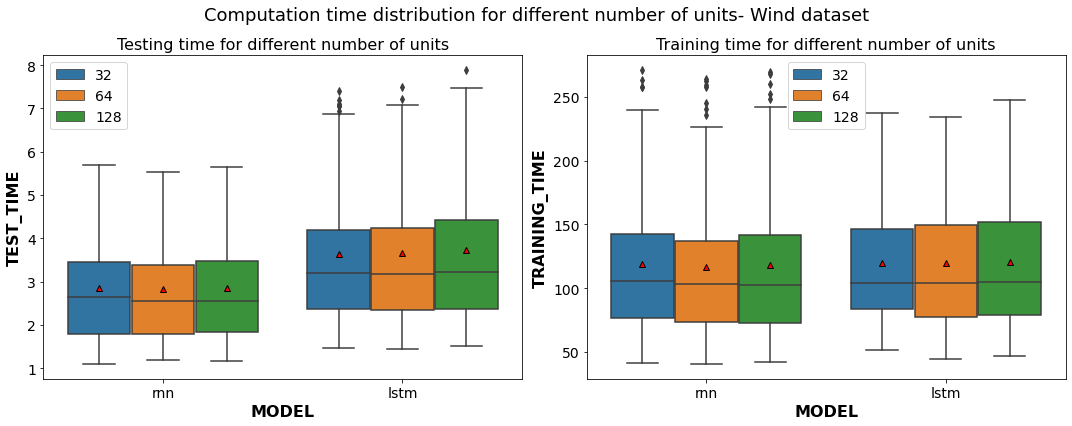

In [24]:
# fig, ax = plt.subplots(1, 3, sharey=True, figsize = (15,8))
fig, ax = plt.subplots(1, 2, figsize = (15,6))
fig.suptitle('Computation time distribution for different number of units- Wind dataset', fontsize=18)

# test time
sns.boxplot(x="MODEL", y="TEST_TIME", data=wind_df, hue="UNITS", showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax=ax[0])
plt_data._set_axes( ax = ax[0] , title = 'Testing time for different number of units', xlabel="MODEL", ylabel="TEST_TIME", legend_loc= 'upper left')

# train time
sns.boxplot(x="MODEL", y="TRAINING_TIME", data=wind_df, hue="UNITS", showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax=ax[1])
plt_data._set_axes( ax = ax[1] , title = 'Training time for different number of units', xlabel="MODEL", ylabel="TRAINING_TIME", legend_loc= 'upper center')


# plt.ylim(10,60)
fig.tight_layout()
plt.show()

##### Demand data

In [333]:
# Demand data
# Units
print( '\nDemand data - RNN -  Units comparison:----------------- ')
print("----Units 32~64----")
compare_2_samples(rmse_demand_rnn_32, rmse_demand_rnn_64, alpha=0.05 )

print("----Units 64~128----")
compare_2_samples(rmse_demand_rnn_64, rmse_demand_rnn_128, alpha=0.05 )

print("----Units 32~128----")
compare_2_samples(rmse_demand_rnn_128, rmse_demand_rnn_32, alpha=0.05 )


Demand data - RNN -  Units comparison:----------------- 
----Units 32~64----
Wilcoxon Signed-Rank Test
Statistics=940.000, p-value=0.03583688399155136
Different distribution (reject H0)
----Units 64~128----
Wilcoxon Signed-Rank Test
Statistics=903.000, p-value=0.021087955813874716
Different distribution (reject H0)
----Units 32~128----
Wilcoxon Signed-Rank Test
Statistics=1192.000, p-value=0.4935795740203516
Same distribution (fail to reject H0)


In [289]:
# Demand data
# Units
print( '\nDemand data - LSTM -  Units comparison:----------------- ')
print("----Units 32~64----")
compare_2_samples(rmse_demand_lstm_32, rmse_demand_lstm_64, alpha=0.05 )

print("----Units 64~128----")
compare_2_samples(rmse_demand_lstm_64, rmse_demand_lstm_128, alpha=0.05 )

print("----Units 32~128----")
compare_2_samples(rmse_demand_lstm_32, rmse_demand_lstm_128, alpha=0.05 )


Demand data - LSTM -  Units comparison:----------------- 
----Units 32~64----
Wilcoxon Signed-Rank Test
Statistics=1208.000, p-value=0.551950754990437
Same distribution (fail to reject H0)
----Units 64~128----
Wilcoxon Signed-Rank Test
Statistics=1248.000, p-value=0.711105504899322
Same distribution (fail to reject H0)
----Units 32~128----
Wilcoxon Signed-Rank Test
Statistics=1286.000, p-value=0.8751444298739965
Same distribution (fail to reject H0)


In [290]:
# Units
print('\nDemand data --- model Units :-------------------------')
print('RNN:   Units  -- 32')
print(rmse_demand_rnn_32.describe())
print( 'Standard error :', np.std(rmse_demand_rnn_32) / np.sqrt(len(rmse_demand_rnn_32)))


Demand data --- model Units :-------------------------
RNN:   Units  -- 32
count    72.000000
mean     33.546404
std       5.785468
min      26.705588
25%      29.668739
50%      31.959084
75%      35.223044
max      58.742223
Name: RMSE, dtype: float64
Standard error : 0.677072489333896


In [291]:
# Units
print('\nDemand data --- model Units :-------------------------')
print('RNN:   Units  -- 64')
print(rmse_demand_rnn_64.describe())
print( 'Standard error :', np.std(rmse_demand_rnn_64) / np.sqrt(len(rmse_demand_rnn_64)))


Demand data --- model Units :-------------------------
RNN:   Units  -- 64
count    72.000000
mean     32.691414
std       8.078909
min      26.118349
25%      28.757032
50%      30.650041
75%      33.926779
max      88.952046
Name: RMSE, dtype: float64
Standard error : 0.9454736303995978


In [292]:
# Units
print('\nDemand data --- model Units :-------------------------')
print('RNN:   Units  -- 128')
print(rmse_demand_rnn_128.describe())
print( 'Standard error :', np.std(rmse_demand_rnn_128) / np.sqrt(len(rmse_demand_rnn_128)))


Demand data --- model Units :-------------------------
RNN:   Units  -- 128
count     72.000000
mean      36.362065
std       17.629410
min       26.375001
25%       29.663720
50%       31.802465
75%       37.369015
max      167.838807
Name: RMSE, dtype: float64
Standard error : 2.063167396750849


In [314]:
# Units
print('\nDemand data --- model Units :-------------------------')
print('LSTM:   Units  -- 32')
print(rmse_demand_lstm_32.describe())
print( 'Standard error :', np.std(rmse_demand_lstm_32) / np.sqrt(len(rmse_demand_lstm_32)))


Demand data --- model Units :-------------------------
LSTM:   Units  -- 32
count    72.000000
mean     30.945823
std       4.286418
min      26.221347
25%      28.510434
50%      29.714219
75%      31.029128
max      49.305906
Name: RMSE, dtype: float64
Standard error : 0.5016388638306376


In [315]:
# Units
print('\nDemand data --- model Units :-------------------------')
print('LSTM:   Units  -- 64')
print(rmse_demand_lstm_64.describe())
print( 'Standard error :', np.std(rmse_demand_lstm_64) / np.sqrt(len(rmse_demand_lstm_64)))


Demand data --- model Units :-------------------------
LSTM:   Units  -- 64
count    72.000000
mean     30.758688
std       4.302238
min      25.935952
25%      28.175898
50%      29.737848
75%      31.551340
max      49.815342
Name: RMSE, dtype: float64
Standard error : 0.5034903112268811


In [316]:
# Units
print('\nDemand data --- model Units :-------------------------')
print('LSTM:   Units  -- 128')
print(rmse_demand_lstm_128.describe())
print( 'Standard error :', np.std(rmse_demand_lstm_128) / np.sqrt(len(rmse_demand_lstm_128)))


Demand data --- model Units :-------------------------
LSTM:   Units  -- 128
count    72.000000
mean     31.072143
std       4.706499
min      25.239257
25%      28.345698
50%      29.927012
75%      31.960816
max      49.680396
Name: RMSE, dtype: float64
Standard error : 0.5508009588991128


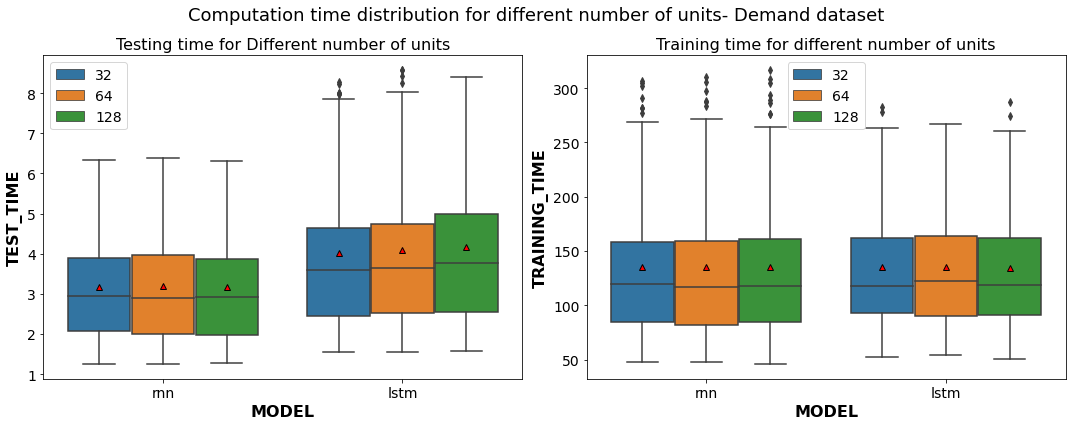

In [32]:
# Demand data
fig, ax = plt.subplots(1, 2, figsize = (15,6))
fig.suptitle('Computation time distribution for different number of units- Demand dataset', fontsize=18)

# test time
sns.boxplot(x="MODEL", y="TEST_TIME", data=demand_df, hue="UNITS", showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax=ax[0])
plt_data._set_axes( ax = ax[0] , title = 'Testing time for Different number of units', xlabel="MODEL", ylabel="TEST_TIME", legend_loc= 'upper left')

# train time
sns.boxplot(x="MODEL", y="TRAINING_TIME", data=demand_df, hue="UNITS", showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax=ax[1])
plt_data._set_axes( ax = ax[1] , title = 'Training time for different number of units', xlabel="MODEL", ylabel="TRAINING_TIME", legend_loc= 'upper center')


# plt.ylim(10,60)
fig.tight_layout()
plt.show()

#### Return sequence

In [360]:
rmse_wind_rnn_T = wind_df[(wind_df['RETURN_SEQUENCE'] == ' True') & (wind_df['MODEL'] == 'rnn') ]['RMSE']
rmse_wind_rnn_F = wind_df[(wind_df['RETURN_SEQUENCE'] == ' False') & (wind_df['MODEL'] == 'rnn')]['RMSE']

rmse_wind_lstm_T = wind_df[(wind_df['RETURN_SEQUENCE'] == ' True') & (wind_df['MODEL'] == 'lstm') ]['RMSE']
rmse_wind_lstm_F = wind_df[(wind_df['RETURN_SEQUENCE'] == ' False') & (wind_df['MODEL'] == 'lstm')]['RMSE']

rmse_demand_rnn_T = demand_df[(demand_df['RETURN_SEQUENCE'] == ' True') & (demand_df['MODEL'] == 'rnn') ]['RMSE']
rmse_demand_rnn_F = demand_df[(demand_df['RETURN_SEQUENCE'] == ' False') & (demand_df['MODEL'] == 'rnn')]['RMSE']

rmse_demand_lstm_T = demand_df[(demand_df['RETURN_SEQUENCE'] == ' True') & (demand_df['MODEL'] == 'lstm') ]['RMSE']
rmse_demand_lstm_F = demand_df[(demand_df['RETURN_SEQUENCE'] == ' False') & (demand_df['MODEL'] == 'lstm')]['RMSE']

#### statistical analysis

##### wind data

In [372]:
#  Wind data
# ret. seq.
print( '\nWind data - RNN - RET. SEQ. comparison:----------------- ')
print("----RET. SEQ. T~F----")
compare_2_samples(rmse_wind_rnn_T, rmse_wind_rnn_F, alpha=0.05 )


Wind data - RNN - RET. SEQ. comparison:----------------- 
----RET. SEQ. T~F----
Wilcoxon Signed-Rank Test
Statistics=2772.000, p-value=0.6001816447705763
Same distribution (fail to reject H0)


In [380]:
#  Wind data
# ret. seq.
print( '\nWind data - LSTM - RET. SEQ. comparison:----------------- ')
print("----RET. SEQ. T~F----")
compare_2_samples(rmse_wind_lstm_T, rmse_wind_lstm_F, alpha=0.05 )


Wind data - LSTM - RET. SEQ. comparison:----------------- 
----RET. SEQ. T~F----
Wilcoxon Signed-Rank Test
Statistics=2890.000, p-value=0.8709495020628893
Same distribution (fail to reject H0)


In [366]:
print('\nWind data --- return sequence :-------------------------')
print('RNN:   RET. SEQ.  -- TRUE')
print(rmse_wind_rnn_T.describe())
print( 'Standard error :', np.std(rmse_wind_rnn_T) / np.sqrt(len(rmse_wind_rnn_T)))


Wind data --- return sequence :-------------------------
RNN:   RET. SEQ.  -- TRUE
count    108.000000
mean      49.847273
std        8.380075
min       39.231962
25%       44.187940
50%       48.322337
75%       54.512184
max       88.840138
Name: RMSE, dtype: float64
Standard error : 0.8026312282801229


In [367]:
print('\nWind data --- return sequence :-------------------------')
print('RNN:   RET. SEQ.  -- FALSE ')
print(rmse_wind_rnn_F.describe())
print( 'Standard error :', np.std(rmse_wind_rnn_F) / np.sqrt(len(rmse_wind_rnn_F)))


Wind data --- return sequence :-------------------------
RNN:   RET. SEQ.  -- FALSE 
count    108.000000
mean      50.461568
std        9.586242
min       39.194964
25%       45.235401
50%       48.610475
75%       53.946964
max      115.493959
Name: RMSE, dtype: float64
Standard error : 0.9181560581356223


In [368]:
print('\nWind data --- return sequence :-------------------------')
print('LSTM:   RET. SEQ.  -- TRUE')
print(rmse_wind_lstm_T.describe())
print( 'Standard error :', np.std(rmse_wind_lstm_T) / np.sqrt(len(rmse_wind_lstm_T)))


Wind data --- return sequence :-------------------------
LSTM:   RET. SEQ.  -- TRUE
count    108.000000
mean      45.714955
std        5.299886
min       38.989107
25%       41.923509
50%       44.677280
75%       47.600894
max       72.254993
Name: RMSE, dtype: float64
Standard error : 0.5076152474475989


In [369]:
print('\nWind data --- return sequence :-------------------------')
print('LSTM:   RET. SEQ.  -- FALSE')
print(rmse_wind_lstm_F.describe())
print( 'Standard error :', np.std(rmse_wind_lstm_F) / np.sqrt(len(rmse_wind_lstm_F)))


Wind data --- return sequence :-------------------------
LSTM:   RET. SEQ.  -- FALSE
count    108.000000
mean      45.350371
std        4.596380
min       38.760609
25%       41.958998
50%       44.144025
75%       47.294556
max       62.871563
Name: RMSE, dtype: float64
Standard error : 0.44023449374012413


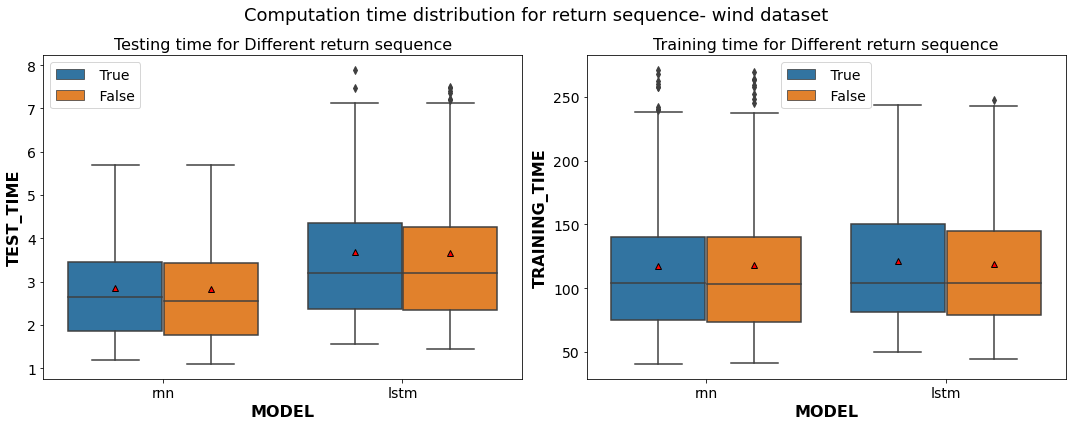

In [34]:
# fig, ax = plt.subplots(1, 3, sharey=True, figsize = (15,8))
fig, ax = plt.subplots(1, 2, figsize = (15,6))
fig.suptitle('Computation time distribution for return sequence- wind dataset', fontsize=18)

sns.boxplot(x="MODEL", y="TEST_TIME", data=wind_df, hue="RETURN_SEQUENCE", showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax=ax[0])
plt_data._set_axes( ax = ax[0] , title = 'Testing time for Different return sequence', xlabel="MODEL", ylabel="TEST_TIME", legend_loc= 'upper left')


sns.boxplot(x="MODEL", y="TRAINING_TIME", data=wind_df, hue="RETURN_SEQUENCE", showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax=ax[1])
plt_data._set_axes( ax = ax[1] , title = 'Training time for Different return sequence', xlabel="MODEL", ylabel="TRAINING_TIME", legend_loc= 'upper center')


# plt.ylim(10,60)
fig.tight_layout()
plt.show()

##### Demand data

In [381]:
#  Demand data
# ret. seq.
print( '\nDemand data - RNN - RET. SEQ. comparison:----------------- ')
print("----RET. SEQ. T~F----")
compare_2_samples(rmse_demand_rnn_T, rmse_demand_rnn_F, alpha=0.05 )


Demand data - RNN - RET. SEQ. comparison:----------------- 
----RET. SEQ. T~F----
Wilcoxon Signed-Rank Test
Statistics=2802.000, p-value=0.6656069240987441
Same distribution (fail to reject H0)


In [382]:
#  Demand data
# ret. seq.
print( '\nDemand data - LSTM - RET. SEQ. comparison:----------------- ')
print("----RET. SEQ. T~F----")
compare_2_samples(rmse_demand_lstm_T, rmse_demand_lstm_F, alpha=0.05 )


Demand data - LSTM - RET. SEQ. comparison:----------------- 
----RET. SEQ. T~F----
Wilcoxon Signed-Rank Test
Statistics=2820.000, p-value=0.7061643226389065
Same distribution (fail to reject H0)


In [387]:
print('\nDemand data --- return sequence :-------------------------')
print('RNN:   RET. SEQ.  -- TRUE')
print(rmse_demand_rnn_T.describe())
print( 'Standard error :', np.std(rmse_demand_rnn_T) / np.sqrt(len(rmse_demand_rnn_T)))


Demand data --- return sequence :-------------------------
RNN:   RET. SEQ.  -- TRUE
count    108.000000
mean      34.956174
std       15.338621
min       26.118349
25%       28.951279
50%       31.193696
75%       36.560533
max      167.838807
Name: RMSE, dtype: float64
Standard error : 1.4691105031092662


In [384]:
print('\nDemand data --- return sequence :-------------------------')
print('RNN:   RET. SEQ.  -- FALSE')
print(rmse_demand_rnn_F.describe())
print( 'Standard error :', np.std(rmse_demand_rnn_F) / np.sqrt(len(rmse_demand_rnn_F)))


Demand data --- return sequence :-------------------------
RNN:   RET. SEQ.  -- FALSE
count    108.000000
mean      33.443747
std        6.347059
min       26.705588
25%       29.673616
50%       32.139617
75%       34.612529
max       60.365893
Name: RMSE, dtype: float64
Standard error : 0.6079118918640335


In [386]:
print('\nDemand data --- return sequence :-------------------------')
print('LSTM:   RET. SEQ.  -- TRUE')
print(rmse_demand_lstm_T.describe())
print( 'Standard error :', np.std(rmse_demand_lstm_T) / np.sqrt(len(rmse_demand_lstm_T)))


Demand data --- return sequence :-------------------------
LSTM:   RET. SEQ.  -- TRUE
count    108.000000
mean      30.905811
std        4.597954
min       26.221347
25%       28.375061
50%       29.604852
75%       31.670802
max       49.815342
Name: RMSE, dtype: float64
Standard error : 0.4403852003456919


In [385]:
print('\nDemand data --- return sequence :-------------------------')
print('LSTM:   RET. SEQ.  -- FALSE')
print(rmse_demand_lstm_F.describe())
print( 'Standard error :', np.std(rmse_demand_lstm_F) / np.sqrt(len(rmse_demand_lstm_F)))


Demand data --- return sequence :-------------------------
LSTM:   RET. SEQ.  -- FALSE
count    108.000000
mean      30.945293
std        4.250111
min       25.239257
25%       28.218980
50%       30.008762
75%       31.149200
max       47.786035
Name: RMSE, dtype: float64
Standard error : 0.4070693929647222


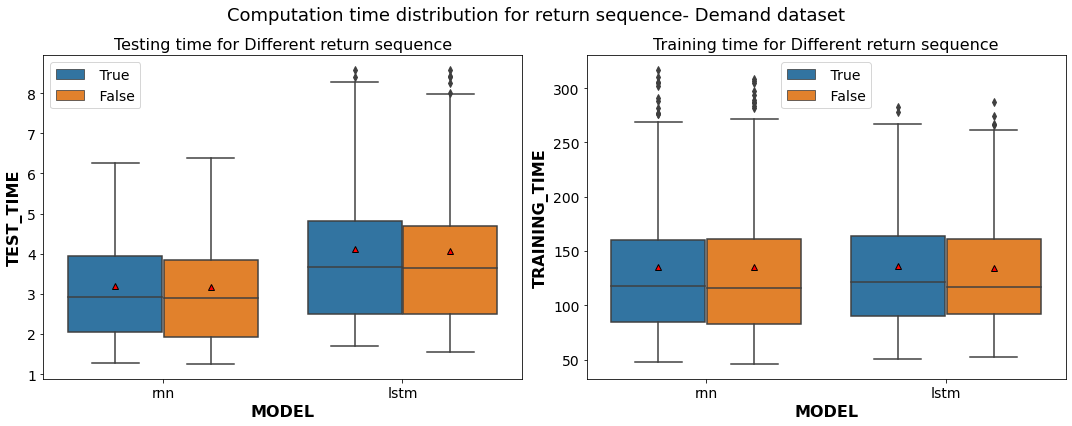

In [36]:
# demand data
fig, ax = plt.subplots(1, 2, figsize = (15,6))
fig.suptitle('Computation time distribution for return sequence- Demand dataset', fontsize=18)

sns.boxplot(x="MODEL", y="TEST_TIME", data=demand_df, hue="RETURN_SEQUENCE", showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax=ax[0])
plt_data._set_axes( ax = ax[0] , title = 'Testing time for Different return sequence', xlabel="MODEL", ylabel="TEST_TIME", legend_loc= 'upper left')


sns.boxplot(x="MODEL", y="TRAINING_TIME", data=demand_df, hue="RETURN_SEQUENCE", showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax=ax[1])
plt_data._set_axes( ax = ax[1] , title = 'Training time for Different return sequence', xlabel="MODEL", ylabel="TRAINING_TIME", legend_loc= 'upper center')



# plt.ylim(10,60)
fig.tight_layout()
plt.show()

### Trainning parameters

In [6]:
norm_df = df[df['NORMALIZATION'] != 'None']

#### Normalization methods

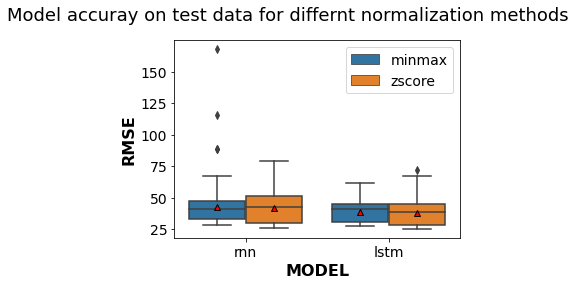

In [10]:

# Cmpare RMSE based on the normalization
fig, ax = plt.subplots( figsize = (5,4)) # 1, 2, sharey=True,
fig.suptitle('Model accuray on test data for differnt normalization methods ', fontsize=18)

sns.boxplot(x="MODEL", y="RMSE", hue = "NORMALIZATION", data=norm_df, showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"})
plt_data._set_axes( ax = ax ,  xlabel="MODEL", ylabel="RMSE", legend_loc= 'upper right')

fig.tight_layout()
plt.show()

In [403]:
rmse_rnn_minmax_df = norm_df[(norm_df['MODEL'] == 'rnn') & (norm_df['NORMALIZATION'] == 'minmax')]['RMSE']
rmse_rnn_zscore_df = norm_df[(norm_df['MODEL'] == 'rnn') & (norm_df['NORMALIZATION'] == 'zscore')]['RMSE']

rmse_lstm_minmax_df = norm_df[(norm_df['MODEL'] == 'lstm') & (norm_df['NORMALIZATION'] == 'minmax')]['RMSE']
rmse_lstm_zscore_df = norm_df[(norm_df['MODEL'] == 'lstm') & (norm_df['NORMALIZATION'] == 'zscore')]['RMSE']

#### statistical analysis

##### RNN

In [401]:
print('Comparision of normalization method for RNN:----------------')
compare_2_samples(rmse_rnn_minmax_df, rmse_rnn_zscore_df, alpha=0.05)

Comparision of normalization method for RNN:----------------
Wilcoxon Signed-Rank Test
Statistics=10482.000, p-value=0.1789242377675756
Same distribution (fail to reject H0)


In [405]:
print('RNN:   Normalization method  -- minnmax')
print(rmse_rnn_minmax_df.describe())
print( 'Standard error :', np.std(rmse_rnn_minmax_df) / np.sqrt(len(rmse_rnn_minmax_df)))

RNN:   Normalization method  -- minnmax
count    216.000000
mean      42.385789
std       14.005296
min       28.182057
25%       32.845243
50%       40.618147
75%       46.965611
max      167.838807
Name: RMSE, dtype: float64
Standard error : 0.9507312633865936


In [406]:
print('RNN:   Normalization method  -- zscore')
print(rmse_rnn_zscore_df.describe())
print( 'Standard error :', np.std(rmse_rnn_zscore_df) / np.sqrt(len(rmse_rnn_zscore_df)))

RNN:   Normalization method  -- zscore
count    216.000000
mean      41.968592
std       12.252351
min       26.118349
25%       30.113899
50%       42.371393
75%       51.010758
max       79.331103
Name: RMSE, dtype: float64
Standard error : 0.8317348824488374


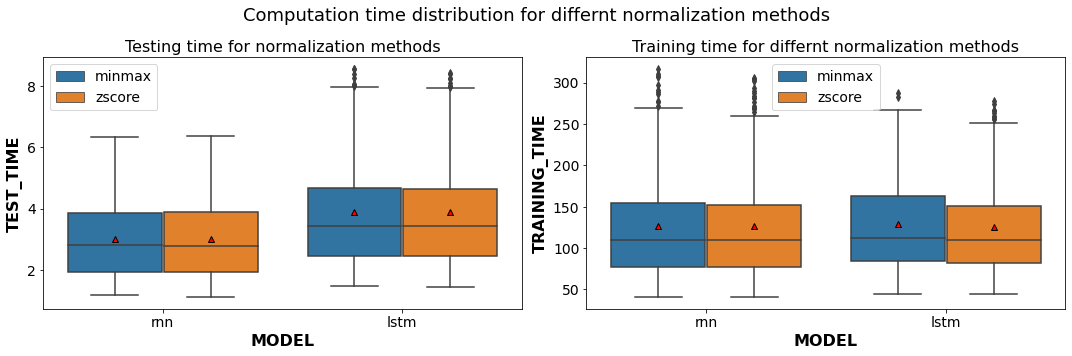

In [13]:
# fig, ax = plt.subplots(1, 3, sharey=True, figsize = (15,8))
fig, ax = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('Computation time distribution for differnt normalization methods', fontsize=18)

sns.boxplot(x="MODEL", y="TEST_TIME", data=norm_df, hue="NORMALIZATION", showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax=ax[0])
plt_data._set_axes( ax = ax[0] , title = 'Testing time for normalization methods', xlabel="MODEL", ylabel="TEST_TIME", legend_loc= 'upper left')


sns.boxplot(x="MODEL", y="TRAINING_TIME", data=norm_df, hue="NORMALIZATION", showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"}, ax=ax[1])
plt_data._set_axes( ax = ax[1] , title = 'Training time for differnt normalization methods', xlabel="MODEL", ylabel="TRAINING_TIME", legend_loc= 'upper center')


# plt.ylim(10,60)
fig.tight_layout()
plt.show()

##### LSTM

In [404]:
print('Comparision of normalization method for LSTM:----------------')
compare_2_samples(rmse_lstm_minmax_df, rmse_lstm_zscore_df, alpha=0.05)

Comparision of normalization method for LSTM:----------------
Wilcoxon Signed-Rank Test
Statistics=8755.000, p-value=0.0012726273100718832
Different distribution (reject H0)


In [407]:
print('LSTM:   Normalization method  -- minmax')
print(rmse_lstm_minmax_df.describe())
print( 'Standard error :', np.std(rmse_lstm_minmax_df) / np.sqrt(len(rmse_lstm_minmax_df)))

LSTM:   Normalization method  -- minmax
count    216.000000
mean      38.883874
std        7.817683
min       27.690128
25%       30.735249
50%       40.650140
75%       44.575544
max       61.403048
Name: RMSE, dtype: float64
Standard error : 0.5306932093685627


In [408]:
print('LSTM:   Normalization method  -- zscore')
print(rmse_lstm_zscore_df.describe())
print( 'Standard error :', np.std(rmse_lstm_zscore_df) / np.sqrt(len(rmse_lstm_zscore_df)))

LSTM:   Normalization method  -- zscore
count    216.000000
mean      37.574341
std        9.446728
min       25.239257
25%       28.614676
50%       38.495004
75%       44.738273
max       72.254993
Name: RMSE, dtype: float64
Standard error : 0.6412788376537497


#### Test split

In [421]:
rmse_rnn_2 =  norm_df[(norm_df['MODEL'] == 'rnn') & (norm_df['TEST_SPLIT'] == 0.2)]['RMSE']
rmse_rnn_3 =  norm_df[(norm_df['MODEL'] == 'rnn') & (norm_df['TEST_SPLIT'] == 0.3)]['RMSE']
rmse_rnn_4 =  norm_df[(norm_df['MODEL'] == 'rnn') & (norm_df['TEST_SPLIT'] == 0.4)]['RMSE']

rmse_lstm_2 =  norm_df[(norm_df['MODEL'] == 'lstm') & (norm_df['TEST_SPLIT'] == 0.2)]['RMSE']
rmse_lstm_3 =  norm_df[(norm_df['MODEL'] == 'lstm') & (norm_df['TEST_SPLIT'] == 0.3)]['RMSE']
rmse_lstm_4 =  norm_df[(norm_df['MODEL'] == 'lstm') & (norm_df['TEST_SPLIT'] == 0.4)]['RMSE']

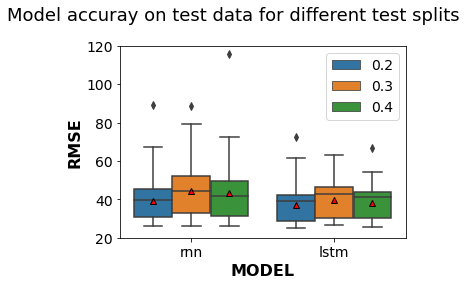

In [14]:
# Cmpare RMSE based on train split
fig, ax = plt.subplots( figsize = (5,4)) # 1, 2, sharey=True,
fig.suptitle('Model accuray on test data for different test splits ', fontsize=18)

sns.boxplot(x="MODEL", y="RMSE", hue = "TEST_SPLIT", data=norm_df, showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"})
plt_data._set_axes( ax = ax, xlabel="MODEL", ylabel="RMSE") 

plt.ylim(20,120)
fig.tight_layout()
plt.show()

#### statistical analysis

##### RNN

In [427]:
print('RNN')
print('Comparision of test split- 0.2 ~ 0.3')
compare_2_samples(rmse_rnn_2, rmse_rnn_3, alpha=0.05)

RNN
Comparision of test split- 0.2 ~ 0.3
Wilcoxon Signed-Rank Test
Statistics=1854.000, p-value=1.9088718199284707e-11
Different distribution (reject H0)


In [429]:
print('RNN')
print('Comparision of test split- 0.3 ~ 0.4')
compare_2_samples(rmse_rnn_3, rmse_rnn_4, alpha=0.05)

RNN
Comparision of test split- 0.3 ~ 0.4
Wilcoxon Signed-Rank Test
Statistics=3683.000, p-value=0.002174911013723973
Different distribution (reject H0)


In [430]:
print('RNN')
print('Comparision of test split- 0.4 ~ 0.2')
compare_2_samples(rmse_rnn_4, rmse_rnn_2, alpha=0.05)

RNN
Comparision of test split- 0.4 ~ 0.2
Wilcoxon Signed-Rank Test
Statistics=3057.000, p-value=1.6055896135097468e-05
Different distribution (reject H0)


##### LSTM

In [431]:
print('LSTM')
print('Comparision of test split- 0.2 ~ 0.3')
compare_2_samples(rmse_lstm_2, rmse_lstm_3, alpha=0.05)

LSTM
Comparision of test split- 0.2 ~ 0.3
Wilcoxon Signed-Rank Test
Statistics=2314.000, p-value=6.813877444001167e-09
Different distribution (reject H0)


In [432]:
print('LSTM')
print('Comparision of test split- 0.3 ~ 0.4')
compare_2_samples(rmse_lstm_3, rmse_lstm_4, alpha=0.05)

LSTM
Comparision of test split- 0.3 ~ 0.4
Wilcoxon Signed-Rank Test
Statistics=3682.000, p-value=0.0021604517191831925
Different distribution (reject H0)


In [433]:
print('LSTM')
print('Comparision of test split- 0.4 ~ 0.2')
compare_2_samples(rmse_lstm_4, rmse_lstm_2, alpha=0.05)

LSTM
Comparision of test split- 0.4 ~ 0.2
Wilcoxon Signed-Rank Test
Statistics=2967.000, p-value=7.01714278686737e-06
Different distribution (reject H0)


#### Batch size

In [438]:
rmse_rnn_b32 =  norm_df[(norm_df['MODEL'] == 'rnn') & (norm_df['BATCH_SIZE'] == 32)]['RMSE']
rmse_rnn_b64 =  norm_df[(norm_df['MODEL'] == 'rnn') & (norm_df['BATCH_SIZE'] == 64)]['RMSE']

rmse_lstm_b32 =  norm_df[(norm_df['MODEL'] == 'lstm') & (norm_df['BATCH_SIZE'] == 32)]['RMSE']
rmse_lstm_b64 =  norm_df[(norm_df['MODEL'] == 'lstm') & (norm_df['BATCH_SIZE'] == 64)]['RMSE']

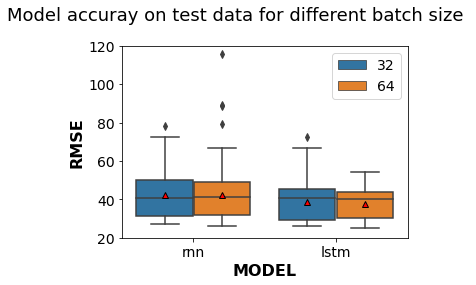

In [15]:
# Cmpare RMSE based on batch size
fig, ax = plt.subplots( figsize = (5,4)) # 1, 2, sharey=True,
fig.suptitle('Model accuray on test data for different batch size ', fontsize=18)

sns.boxplot(x="MODEL", y="RMSE", hue = "BATCH_SIZE", data=norm_df, showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black"})
plt_data._set_axes( ax = ax, xlabel="MODEL", ylabel="RMSE") 

plt.ylim(20,120)
fig.tight_layout()
plt.show()

#### statistical analysis

##### RNN

In [444]:
print('RNN')
print('Comparision of batch size- 32 ~ 64')
compare_2_samples(rmse_rnn_b32, rmse_rnn_b64, alpha=0.05)

RNN
Comparision of batch size- 32 ~ 64
Wilcoxon Signed-Rank Test
Statistics=10431.000, p-value=0.1616528873075811
Same distribution (fail to reject H0)


In [441]:
print('RNN:   Batch size  -- 32')
print(rmse_rnn_b32.describe())
print( 'Standard error :', np.std(rmse_rnn_b32) / np.sqrt(len(rmse_rnn_b32)) )

RNN:   Normalization method  -- minnmax
count    216.000000
mean      42.316559
std       14.036944
min       26.935409
25%       31.429538
50%       40.613833
75%       49.961025
max      167.838807
Name: RMSE, dtype: float64
Standard error : 0.9528796603632641


In [442]:
print('RNN:   Batch size  -- 64')
print(rmse_rnn_b64.describe())
print( 'Standard error :', np.std(rmse_rnn_b64) / np.sqrt(len(rmse_rnn_b64)) )

RNN:   Batch size  -- 64
count    216.000000
mean      42.037822
std       12.218062
min       26.118349
25%       31.796153
50%       41.139022
75%       48.813438
max      115.493959
Name: RMSE, dtype: float64
Standard error : 0.8294071709309822


##### LSTM

In [443]:
print('LSTM')
print('Comparision of batch size- 32 ~ 64')
compare_2_samples(rmse_lstm_b32, rmse_lstm_b64, alpha=0.05)

LSTM
Comparision of batch size- 32 ~ 64
Wilcoxon Signed-Rank Test
Statistics=10171.000, p-value=0.09251683829566125
Same distribution (fail to reject H0)


In [445]:
print('LSTM:   Batch size  -- 32')
print(rmse_lstm_b32.describe())
print( 'Standard error :', np.std(rmse_lstm_b32) / np.sqrt(len(rmse_lstm_b32)) )

LSTM:   Batch size  -- 32
count    216.000000
mean      38.731890
std        9.514669
min       25.943724
25%       29.467378
50%       40.545457
75%       45.360195
max       72.254993
Name: RMSE, dtype: float64
Standard error : 0.6458909029555919


In [447]:
print('LSTM:   Batch size  -- 64')
print(rmse_lstm_b64.describe())
print( 'Standard error :', np.std(rmse_lstm_b64) / np.sqrt(len(rmse_lstm_b64)) )

LSTM:   Batch size  -- 64
count    216.000000
mean      37.726325
std        7.757668
min       25.239257
25%       30.131119
50%       40.174008
75%       43.936040
max       54.324076
Name: RMSE, dtype: float64
Standard error : 0.5266191657292735
